Exercitiul 1 - Scrie propria implementare de Bag of Words de la zero. Ar trebui să furnizeze atât reprezentări binare, cât și reprezentări pentru numărul de apariții.

In [ ]:
from collections import Counter

def create_vocabulary(documents):
    vocabulary = set()
    for document in documents:
        words = document.split()
        vocabulary.update(words)
    return sorted(list(vocabulary))

def vectorize_binary(document, vocabulary):
    words = set(document.split())
    return [1 if word in words else 0 for word in vocabulary]

def vectorize_frequency(document, vocabulary):
    word_count = Counter(document.split())
    return [word_count[word] if word in word_count else 0 for word in vocabulary]

documents = [
    "pisica doarme pe covor",
    "câinele aleargă în grădină",
    "pisica joacă și câinele doarme"
]

vocabulary = create_vocabulary(documents)

vectors_binary = [vectorize_binary(doc, vocabulary) for doc in documents]
vectors_frequency = [vectorize_frequency(doc, vocabulary) for doc in documents]

(vocabulary, vectors_binary, vectors_frequency)


(['aleargă',
  'covor',
  'câinele',
  'doarme',
  'grădină',
  'joacă',
  'pe',
  'pisica',
  'în',
  'și'],
 [[0, 1, 0, 1, 0, 0, 1, 1, 0, 0],
  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
  [0, 0, 1, 1, 0, 1, 0, 1, 0, 1]],
 [[0, 1, 0, 1, 0, 0, 1, 1, 0, 0],
  [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
  [0, 0, 1, 1, 0, 1, 0, 1, 0, 1]])

Exercitiul 2 - Implementează Tf-Idf de la zero. Definește oricâte funcții ajutătoare crezi necesare.

In [ ]:
import math
from collections import Counter

docs =  [
    "Pisica neagră se plimbă lin pe covorul roșu în lumina lunii.",
    "Câinele fidel așteaptă răbdător lângă ușa din față, ascultând sunetele nopții.",
    "Soarele răsare peste oraș, aducând lumină și căldură într-o nouă zi.",
    "Programatorul scrie cod în liniște, cu cafeaua aburindă lângă tastatură.",
    "Artistul pictează un peisaj de toamnă, cu nuanțe vibrante de portocaliu și roșu.",
    "Pisica și câinele stau împreună pe prag, privind curioși spre stradă.",
    "Copiii joacă fotbal în parc, râzând și alergând sub soarele amiezii.",
    "În grădină, albinele zboară de la o floare la alta, polenizând plantele.",
    "Astronomul studiază stelele, înregistrând date și observații într-un jurnal vechi.",
    "Chef-ul pregătește un desert sofisticat, combinând ingrediente exotice cu tehnică rafinată."
]

def compute_tf(text):
    tf_text = Counter(text.split())
    for i in tf_text:
        tf_text[i] = tf_text[i] / float(len(text.split()))
    return tf_text

def compute_idf(word, docs):
    return math.log(len(docs) / sum([1.0 for d in docs if word in d]))

def compute_tfidf(docs):
    documents_list = []
    idf_values = {}

    all_words = set([word for doc in docs for word in doc.split()])
    for word in all_words:
        idf_values[word] = compute_idf(word, docs)

    for doc in docs:
        tf = compute_tf(doc)
        tfidf = {}
        for word, val in tf.items():
            tfidf[word] = val * idf_values[word]
        documents_list.append(tfidf)

    return documents_list

tfidf_scores = compute_tfidf(docs)
for doc_index, tfidf_scores in enumerate(tfidf_scores):
    print(f"Document {doc_index + 1}: {tfidf_scores}")


Document 1: {'Pisica': 0.14631253749400913, 'neagră': 0.20932591754491328, 'se': 0.10945207312053964, 'plimbă': 0.20932591754491328, 'lin': 0.14631253749400913, 'pe': 0.08329915744310501, 'covorul': 0.20932591754491328, 'roșu': 0.14631253749400913, 'în': 0.06301338005090412, 'lumina': 0.20932591754491328, 'lunii.': 0.20932591754491328}
Document 2: {'Câinele': 0.20932591754491328, 'fidel': 0.20932591754491328, 'așteaptă': 0.20932591754491328, 'răbdător': 0.20932591754491328, 'lângă': 0.14631253749400913, 'ușa': 0.20932591754491328, 'din': 0.14631253749400913, 'față,': 0.20932591754491328, 'ascultând': 0.20932591754491328, 'sunetele': 0.20932591754491328, 'nopții.': 0.20932591754491328}
Document 3: {'Soarele': 0.20932591754491328, 'răsare': 0.20932591754491328, 'peste': 0.20932591754491328, 'oraș,': 0.20932591754491328, 'aducând': 0.20932591754491328, 'lumină': 0.20932591754491328, 'și': 0.06301338005090412, 'căldură': 0.20932591754491328, 'într-o': 0.20932591754491328, 'nouă': 0.2093259

Exercitul 3 - Vezi distanța dintre niște cuvinte în 2D folosind PCA (sau altă modalitate de reducere a dimensionalității).

In [ ]:
import spacy
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_md")

words = ["dog", "cat", "fish", "bird", "tiger", "lion", "banana", "apple", "orange", "carrot", "computer", "phone", "book", "paper"]

word_vectors = np.array([nlp(word).vector for word in words])

pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Vizualizăm cuvintele în 2D
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# Adăugăm etichete pentru fiecare punct
for i, word in enumerate(words):
    plt.text(word_vectors_2d[i, 0], word_vectors_2d[i, 1], word)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Vizualizarea cuvintelor în 2D folosind PCA")
plt.show()

Exercitul 5 - Vizualizați distanțele dintre câteva cuvinte în 2D folosind PCA (sau alte tehnici de reducere a numărului de dimensiuni).

In [ ]:
!pip install spacy
!pip install scikit-learn
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 13.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


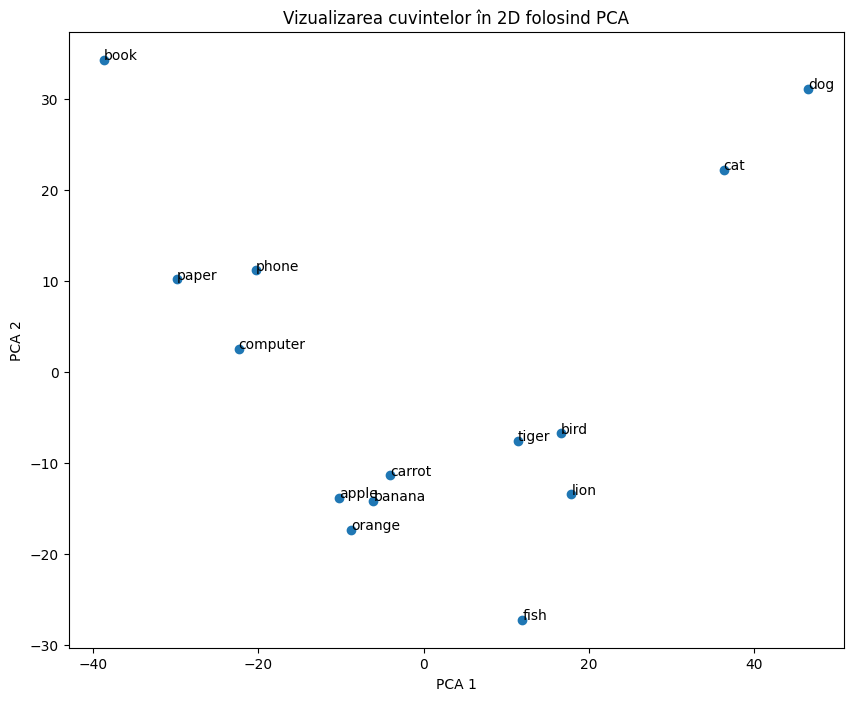

In [ ]:
import spacy
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_md")

words = ["dog", "cat", "fish", "bird", "tiger", "lion", "banana", "apple", "orange", "carrot", "computer", "phone", "book", "paper"]

word_vectors = np.array([nlp(word).vector for word in words])

pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Vizualizăm cuvintele în 2D
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# Adăugăm etichete pentru fiecare punct
for i, word in enumerate(words):
    plt.text(word_vectors_2d[i, 0], word_vectors_2d[i, 1], word)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Vizualizarea cuvintelor în 2D folosind PCA")
plt.show()